<a href="https://colab.research.google.com/github/zeynepsenak/Stockprediction-CNN-RNN-/blob/master/Stockprediction(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RNN - Stock Prediction 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#unser data : df
#APPLE stock 
df = web.DataReader('AAPL', data_source='yahoo', start='2004-01-01', end='2020-01-01') 
#GOOGLE stock
#df2 = web.DataReader('GOOGL', data_source='yahoo', start='2004-08-01', end='2020-01-01') 
#df = pd.concat([df1,df2])

df #unser data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-01-02,1.553571,1.512857,1.539286,1.520000,36160600.0,1.315860
2004-01-05,1.599286,1.530000,1.530000,1.583571,98754600.0,1.370894
2004-01-06,1.601429,1.550714,1.589286,1.577857,127337000.0,1.365947
2004-01-07,1.630714,1.566429,1.578571,1.613571,146718600.0,1.396865
2004-01-08,1.695000,1.617857,1.631429,1.668571,115075800.0,1.444478
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313


In [ ]:
df.shape #unser data shape

(4027, 6)

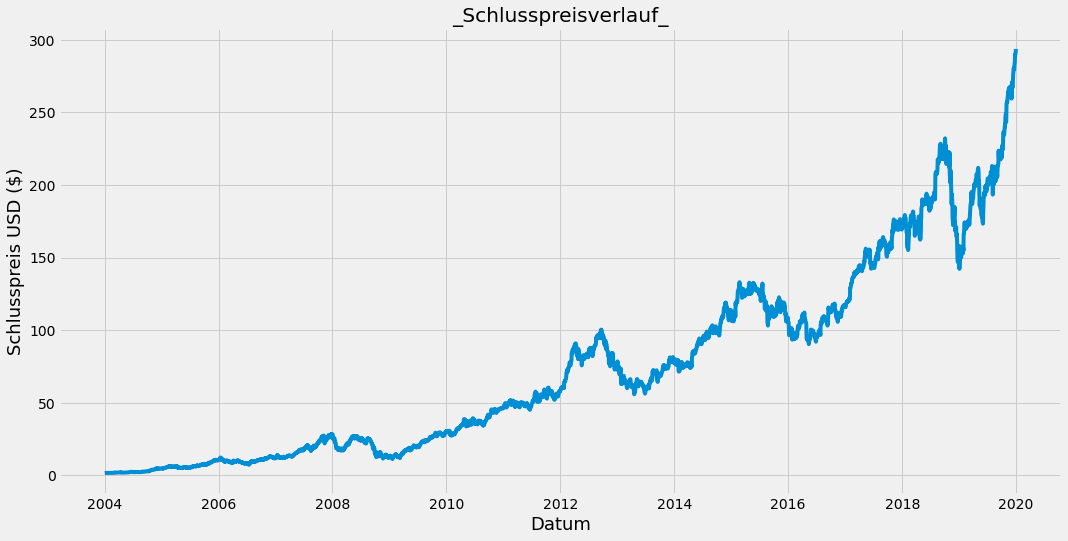

In [ ]:
#Visualizieren die Schlusspreisverlauff
plt.figure(figsize=(16,8))
plt.title('_Schlusspreisverlauf_')
plt.plot(df['Close'])
plt.xlabel('Datum',fontsize=18)
plt.ylabel('Schlusspreis USD ($)',fontsize=18)
plt.show()


In [ ]:
data_cl = df.filter(['Close']) #Schluss (Close) Column von Daten : data_cl
clset = data_cl.values #numpy array - data_cl : cl_set
training_data_len = math.ceil( len(clset) *.8) #Train Reiheanzahl

training_data_len

3222

In [ ]:
#Skalierung zwischen 0-1 
sc = MinMaxScaler(feature_range=(0, 1)) 
sc_data = sc.fit_transform(clset)

sc_data

array([[0.00000000e+00],
       [2.17613578e-04],
       [1.98052774e-04],
       ...,
       [9.86820915e-01],
       [9.92708709e-01],
       [1.00000000e+00]])

In [ ]:
train_data = sc_data[0:training_data_len  , : ] #scaliertes trainingsset
#Data teilen: x_train und y_train 
x_train=[]
y_train=[]

#61. günün kapanış fiyatını tahmin etmek için önceki 60 günlük veri seti
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #x_train : column1: 0-59 , column2: 1-60, column3: 2-61, ... 
    y_train.append(train_data[i, 0]) #y_train : column1: 60, column2: 61, column3: 62, ...
    if i<= 60:  #örnek bir küme (0-59, x_train) ve (60, y_train)
      print(x_train)
      print(y_train)

[array([0.        , 0.00021761, 0.00019805, 0.00032031, 0.00050858,
       0.00042056, 0.00059905, 0.00069441, 0.00071397, 0.00038388,
       0.00035209, 0.00035454, 0.0003252 , 0.00022006, 0.00031297,
       0.000423  , 0.00043767, 0.00030319, 0.00034231, 0.00031297,
       0.00025429, 0.00023962, 0.0001247 , 0.00027874, 0.00034965,
       0.00033987, 0.00041567, 0.00061616, 0.00059905, 0.00042056,
       0.00045968, 0.00048413, 0.00029097, 0.00027385, 0.0002225 ,
       0.00026407, 0.0003741 , 0.00043034, 0.00064551, 0.00066996,
       0.00061861, 0.00064551, 0.0009487 , 0.00133502, 0.00115408,
       0.00142305, 0.00156486, 0.00143527, 0.00153552, 0.00126411,
       0.00111007, 0.00120054, 0.0010734 , 0.00111985, 0.00111985,
       0.00098048, 0.00103183, 0.00136681, 0.00140837, 0.0016211 ])]
[0.0016235433938904783]


In [ ]:
#x_train und y_train - numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Daten Formen - zu LTSM Form
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape #wie ist es zieht aus?

(3162, 60, 1)

In [ ]:
#LSTM Network Modell bauen
model = Sequential()
#50 nöronlu ilk katman - inputu x_train
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
#50 nöronlu ikinci katman
model.add(LSTM(units=50, return_sequences=False))
#2 Dense Katman 1.:25, 2.:1 
model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile => optimizer:adam loss:ortalama kara hatası
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train das Modell
model.fit(x_train, y_train, batch_size=8, epochs=9)

Epoch 1/9
3162/3162 [==============================] - 20s 6ms/step - loss: 1.8898e-05
Epoch 2/9
3162/3162 [==============================] - 20s 6ms/step - loss: 1.9474e-05
Epoch 3/9
3162/3162 [==============================] - 20s 6ms/step - loss: 1.9167e-05
Epoch 4/9
3162/3162 [==============================] - 20s 6ms/step - loss: 1.9876e-05
Epoch 5/9
3162/3162 [==============================] - 21s 7ms/step - loss: 2.0320e-05
Epoch 6/9
3162/3162 [==============================] - 21s 6ms/step - loss: 2.1956e-05
Epoch 7/9
3162/3162 [==============================] - 21s 6ms/step - loss: 1.8866e-05
Epoch 8/9
3162/3162 [==============================] - 20s 6ms/step - loss: 2.0417e-05
Epoch 9/9
3162/3162 [==============================] - 20s 6ms/step - loss: 2.2141e-05


In [ ]:
#Test Daten
test_data = sc_data[training_data_len - 60: , : ]
#x_test und y_test Daten
x_test = []
y_test =  clset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

y_test.shape    

(805, 1)

In [ ]:
#x_test zu numpy array 
x_test = np.array(x_test)

In [ ]:
#Daten Formen - zu LTSM Form
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

x_test.shape

(805, 60, 1)

In [ ]:
#Vorhergesagte Preis Werte Model
predictions = model.predict(x_test) 
predictions = sc.inverse_transform(predictions)#Undo Skalierung

In [ ]:
#RMSE Wert - Perfektion des Modells - (Perfekt:0)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

9.806543922591104

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


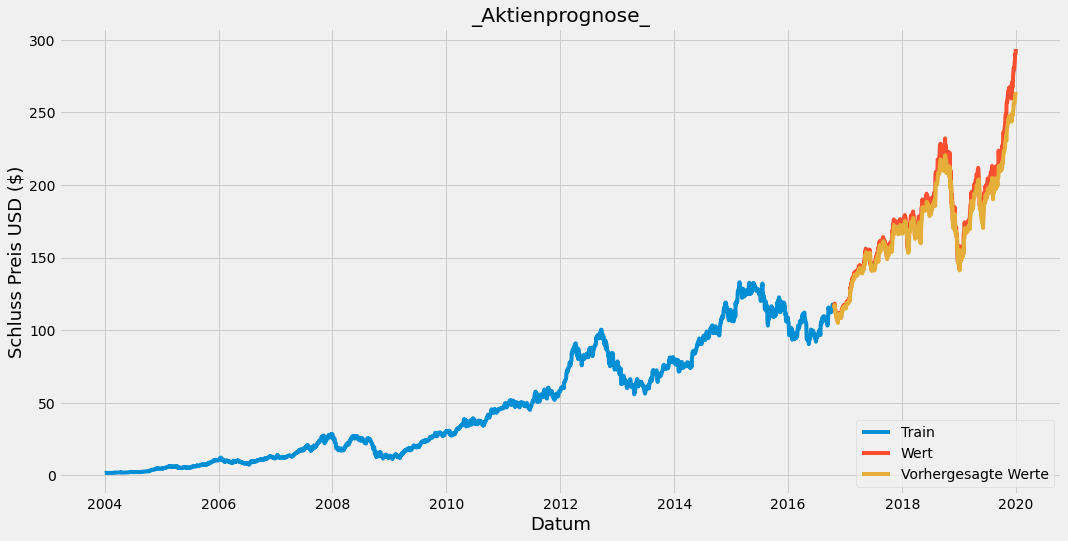

In [ ]:
#Plot/Create the data for the graph
train = data_cl[:training_data_len]
valid = data_cl[training_data_len:]
valid['Predictions'] = predictions

#Graph
plt.figure(figsize=(16,8))
plt.title('_Aktienprognose_')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schluss Preis USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Wert', 'Vorhergesagte Werte'], loc='lower right')
plt.show()

In [ ]:
#Schluss Werte und vorhergesagte Werte
valid

,Close,Predictions
Date,,
2016-10-19,117.120003,119.596947
2016-10-20,117.059998,119.261513
2016-10-21,116.599998,119.243362
2016-10-24,117.650002,118.764221
2016-10-25,118.250000,119.878502
...,...,...
2019-12-24,284.269989,264.113098
2019-12-26,289.910004,264.310394
2019-12-27,289.799988,267.734772


In [ ]:
#Get the quote
#APPLE
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#GOOGLE
#google_quote = web.DataReader('AAPL', data_source='yahoo', start='2004-08-01', end='2020-01-01')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Letzte 60 Tagen Schlusspreis 
letzte_60 = new_df[-60:].values
#Skalieren 0-1
letzte_60_sc = sc.transform(letzte_60)


X_test = []
X_test.append(letzte_60_sc)
#numpy array
X_test = np.array(X_test)
#Datenformung
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#vorhergesagte Werte
pred_price = model.predict(X_test)
#undo Skalierung
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

[[271.69577]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
